## Hypothesis testing: checking a sample for normality

See also: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

### Generate a normal sample

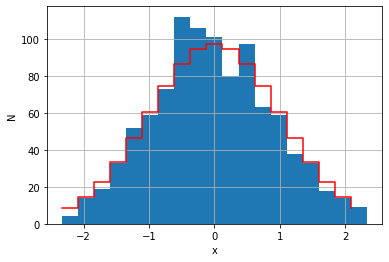

In [2]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the normal distributions to use
# and number of points per sample
mu=0
sig=1
N=1000

# Generate a normal sample 
x = scp.norm.rvs(mu, sig, N)

# Define bins of the histogram; choose limits using the 
# quantile function to an interval with relevant values
bins= np.linspace(scp.norm.ppf(0.01,mu,sig), scp.norm.ppf(0.99,mu,sig), 20)

# Plot histogram
h= plt.hist(x,bins)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('N')

# Calculate predicted bin value by substractig CDF values at the borders
pred_x= []
pred_y= []
for i in range(len(bins)-1):
    pred_x.append( bins[i] )
    pred_y.append( N * ( scp.norm.cdf(bins[i+1],mu,sig) - scp.norm.cdf(bins[i],mu,sig) ) )

p= plt.step(pred_x,pred_y,where="post",color="red")


#### Shapiro-Wilks test

In [3]:
SW = scp.shapiro(x)
print("SW statistic: ",SW[0], "  SW P-value: ",SW[1])

SW statistic:  0.9982831478118896   SW P-value:  0.4219004809856415


#### Normal test

In [4]:
NT = scp.normaltest(x)
print("NT statistic: ",NT[0], "  NT P-value: ",NT[1])

NT statistic:  3.3077848737325866   NT P-value:  0.1913038194707305


### Generate a non-normal sample

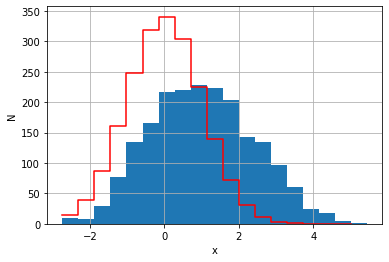

In [13]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the normal distributions to use
# and number of points per sample
mu1=0
sig1=1
N1=1000

mu2=2
sig2=1
N2=1000

# Combine two normal samples 
x = []
x.extend( scp.norm.rvs(mu1, sig1, N1) )
x.extend( scp.norm.rvs(mu2, sig2, N2) )

# Define bins of the histogram; choose limits using the 
# quantile function to an interval with relevant values
bins= np.linspace(np.amin(x), np.amax(x), 20)

# Plot histogram
h= plt.hist(x,bins)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('N')

# Calculate predicted bin value by substractig CDF values at the borders
pred_x= []
pred_y= []
for i in range(len(bins)-1):
    pred_x.append( bins[i] )
    pred_y.append( (N1+N2) * ( scp.norm.cdf(bins[i+1],mu1,sig1) - scp.norm.cdf(bins[i],mu1,sig1) ) )

p= plt.step(pred_x,pred_y,where="post",color="red")

#### Shapiro-Wilks test

In [14]:
SW = scp.shapiro(x)
print("SW statistic: ",SW[0], "  SW P-value: ",SW[1])

SW statistic:  0.9953444004058838   SW P-value:  6.9186849032121245e-06


#### Normal test

In [15]:
NT = scp.normaltest(x)
print("NT statistic: ",NT[0], "  NT P-value: ",NT[1])

NT statistic:  29.523494022262657   NT P-value:  3.881992838027837e-07
